# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX + ASIA_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2021-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

In [4]:
fwd = ['EUR1M CMPN Curncy', 'GBP1M CMPN Curncy', 'AUD1M CMPN Curncy', 
       'NZD1M CMPN Curncy', 'JPY1M CMPN Curncy', 'CAD1M CMPN Curncy', 
       'SEK1M CMPN Curncy', 'NOK1M CMPN Curncy', 'CHF1M CMPN Curncy',
       'CNH1M CMPN Curncy', 'SGD1M CMPN Curncy', 'THB1M CMPN Curncy', 
       'IHN1M CMPN Curncy', 'IRN1M CMPN Curncy', 'MRN1M CMPN Curncy', 
       'NTN1M CMPN Curncy', 'KWN1M CMPN Curncy', 'PPN1M CMPN Curncy']

fwd_scale_all = {"EURUSD": 10000,
                 "GBPUSD" : 10000,
                 "AUDUSD" : 10000,
                 "NZDUSD" : 10000,
                 "USDJPY" : 100,
                 "USDCAD" : 10000,
                 "USDSEK" : 10000,
                 "USDNOK" : 10000,
                 "USDCHF" : 10000,
                 'USDCNH': 10000,
                'USDSGD': 10000,
                'USDTHB': 100,
                'USDIDR': 1,
                'USDINR': 100,
                'USDMYR': 10000,
                'USDTWD': 1,
                'USDKRW': 1,
                'USDPHP': 1}

fwd_data = new_raw_data[fwd]
fwd_data.columns = fwd_scale_all.keys()
for c in fwd_scale_all.keys():
  fwd_data[c] = fwd_data[c]/fwd_scale_all[c]
  
fwd_price_ori = spot_price_ori[fwd_scale_all.keys()] + fwd_data

C:\Users\vin_s\AppData\Local\Temp/ipykernel_84012/2889027844.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fwd_data[c] = fwd_data[c]/fwd_scale_all[c]


In [5]:
bp_usd = fwd_price_ori.pipe(standardize_series, "prices").pipe(np.log10) - spot_price_ori[fwd_scale_all.keys()].pipe(standardize_series, "prices").pipe(np.log10)

# Data integrity

In [6]:
spot_price_ori[fwd_scale_all.keys()].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5635 entries, 2000-01-03 to 2021-08-06
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  5635 non-null   float64
 1   GBPUSD  5635 non-null   float64
 2   AUDUSD  5635 non-null   float64
 3   NZDUSD  5635 non-null   float64
 4   USDJPY  5635 non-null   float64
 5   USDCAD  5635 non-null   float64
 6   USDSEK  5635 non-null   float64
 7   USDNOK  5635 non-null   float64
 8   USDCHF  5635 non-null   float64
 9   USDCNH  2860 non-null   float64
 10  USDSGD  5635 non-null   float64
 11  USDTHB  5635 non-null   float64
 12  USDIDR  3680 non-null   float64
 13  USDINR  4069 non-null   float64
 14  USDMYR  4069 non-null   float64
 15  USDTWD  5630 non-null   float64
 16  USDKRW  4070 non-null   float64
 17  USDPHP  4060 non-null   float64
dtypes: float64(18)
memory usage: 965.5 KB


In [7]:
fwd_price_ori.pipe(fill_date).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5635 entries, 2000-01-03 to 2021-08-06
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  5635 non-null   float64
 1   GBPUSD  5635 non-null   float64
 2   AUDUSD  5635 non-null   float64
 3   NZDUSD  5625 non-null   float64
 4   USDJPY  5635 non-null   float64
 5   USDCAD  5629 non-null   float64
 6   USDSEK  5632 non-null   float64
 7   USDNOK  5629 non-null   float64
 8   USDCHF  5631 non-null   float64
 9   USDCNH  2842 non-null   float64
 10  USDSGD  5625 non-null   float64
 11  USDTHB  5613 non-null   float64
 12  USDIDR  3678 non-null   float64
 13  USDINR  4006 non-null   float64
 14  USDMYR  4057 non-null   float64
 15  USDTWD  5598 non-null   float64
 16  USDKRW  4065 non-null   float64
 17  USDPHP  4031 non-null   float64
dtypes: float64(18)
memory usage: 836.4 KB


# Signal

In [8]:
def custom_skew(series, window):
  num = (series - series.rolling(window).mean())**3
  denom = series.rolling(window).std(ddof=0)**3
  return (num/denom).rolling(window).mean()

In [9]:
sig = bp_usd.ffill().pipe(custom_skew, 21*3).pipe(cap_helper, 10).pipe(rolling_mean, 5) * -1

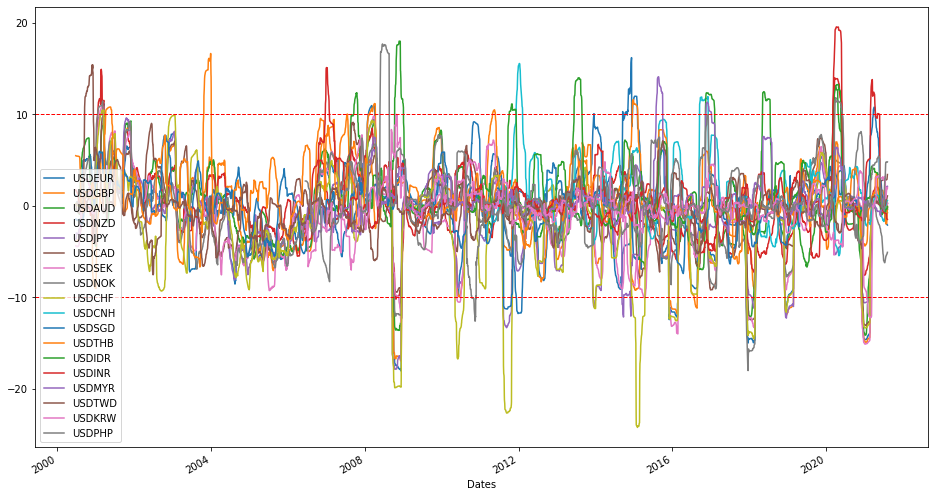

In [10]:
bp_usd.ffill().pipe(custom_skew, 21*3).plot()
plt.axhline(-10, linestyle='--', color='red', lw=1, zorder = 2)
plt.axhline(10, linestyle='--', color='red', lw=1, zorder = 2)

# Backtest Daily Rebal

In [11]:
daily_bt = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    asset_groups={"ASIA":ASIA_FX, "G10":G10_FX})
daily_bt.run()

Re-arranging asset columns
Asset scaling ...
Sector scaling ...
    Grouping by [ASIA, G10]
Portfolio scaling ...
    Grouping by [ALL]


In [12]:
get_summary(daily_bt)

Returns   : 0.040634894814971984
Vol       : 0.1123224649914136
SR        : 0.36176997021992247
Max DD    : -38.89

C Returns : 0.03490562708721086
C SR      : 0.23269542589174053
C Max DD  : -34.52

Hit rate  : 0.526
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.11


In [13]:
get_returns_stats(daily_bt.asset_rtn, daily_bt.wts)

,USDAUD,USDCAD,USDCHF,USDCNH,USDEUR,USDGBP,USDIDR,USDINR,USDJPY,USDKRW,USDMYR,USDNOK,USDNZD,USDPHP,USDSEK,USDSGD,USDTHB,USDTWD
annualized_return,0.001537,0.121145,-0.320744,1.369392,0.824724,0.89203,0.258372,0.764105,0.541258,0.0875,-0.922512,-0.029236,-0.042721,-0.512636,0.549335,0.689231,0.882716,-0.472989
sharpe,0.001064,0.076983,-0.132606,0.572631,0.461548,0.482007,0.080524,0.480705,0.321981,0.047614,-0.530195,-0.018904,-0.031441,-0.233468,0.342748,0.198338,0.252187,-0.162913
dollar_sharpe,-0.005793,0.066996,-0.143011,0.565098,0.446419,0.463303,0.063124,0.493751,0.313537,0.043568,-0.528475,-0.026486,-0.036717,-0.240499,0.329891,0.159759,0.241746,-0.184028
trade_sharpe,0.001064,0.076983,-0.132606,0.572631,0.461548,0.482007,0.080524,0.480705,0.321981,0.047614,-0.530195,-0.018904,-0.031441,-0.233468,0.342748,0.198338,0.252187,-0.162913
long_sharpe,-0.533202,-0.338223,-0.29819,0.031029,0.462652,0.232455,0.061335,0.375511,0.398747,0.178105,-0.622609,-0.190503,-0.449395,-0.383275,0.162835,0.146742,-1.274064,-0.409785
short_sharpe,0.437052,0.426351,0.493538,0.790955,0.476807,0.690974,0.096488,0.5462,0.131208,-0.064218,-0.465375,0.228566,0.326737,-0.150415,0.7857,0.24312,1.188093,0.457809
sortino,0.000586,0.044154,-0.057987,0.324333,0.302969,0.303167,0.042007,0.279255,0.201952,0.027171,-0.274904,-0.01132,-0.017641,-0.128821,0.202881,0.114642,0.151956,-0.081043
max_drawdown,-11.971775,-7.658189,-10.472228,-9.141966,-4.369315,-4.262471,-8.925223,-3.721176,-5.413075,-12.991494,-14.976036,-7.689583,-9.37988,-12.928503,-4.084007,-20.061446,-16.85661,-21.135184
max_drawdown_start,2009-11-16,2009-10-14,2001-12-14,2016-09-15,2008-10-27,2009-11-16,2019-07-18,2008-08-08,2014-12-05,2007-08-21,2006-11-21,2003-08-26,2014-07-09,2001-10-25,2008-11-21,2011-10-03,2003-08-06,2002-03-07
max_drawdown_end,2021-02-24,2018-02-01,2004-12-03,2016-11-23,2013-02-01,2013-01-02,2020-03-23,2010-05-25,2020-12-17,2013-05-08,2020-03-23,2020-03-20,2020-03-20,2017-08-15,2014-03-18,2021-03-08,2006-01-31,2002-07-17


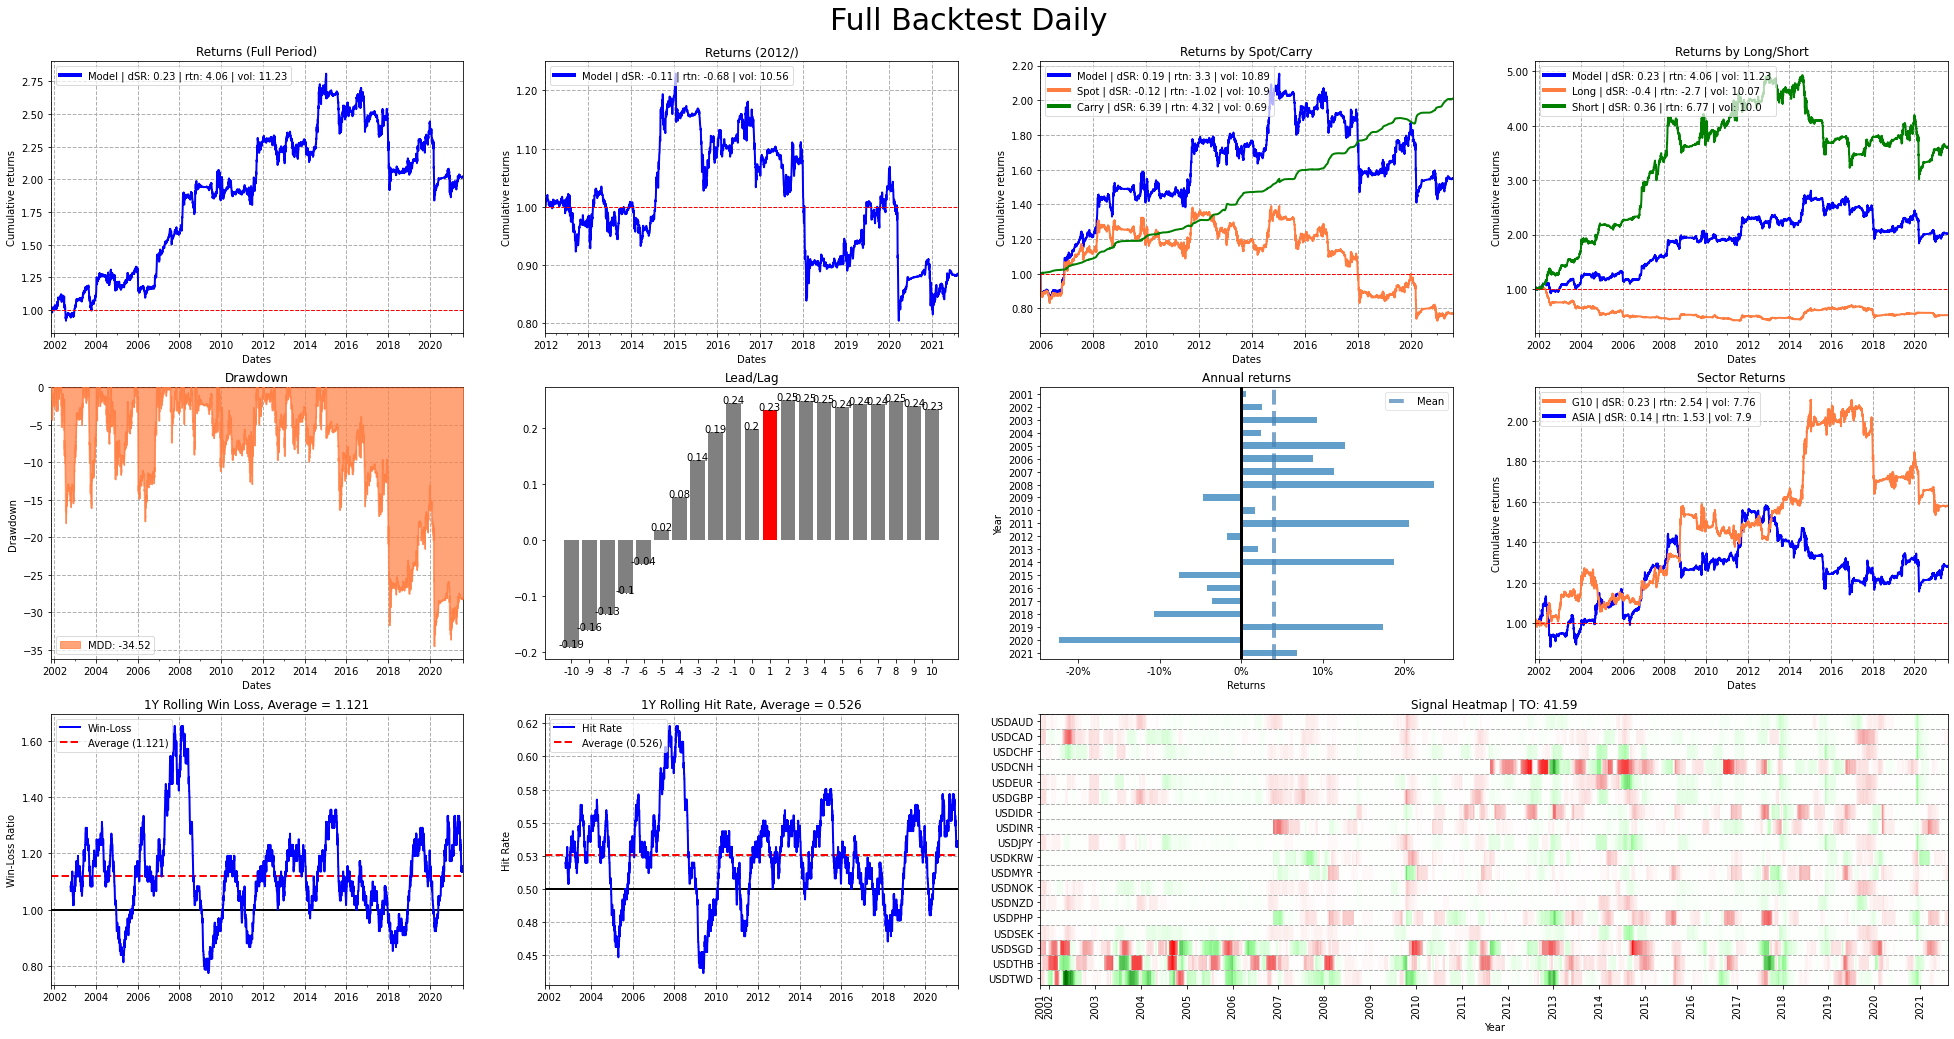

In [14]:
plot_bt2(daily_bt, t="Full Backtest Daily")

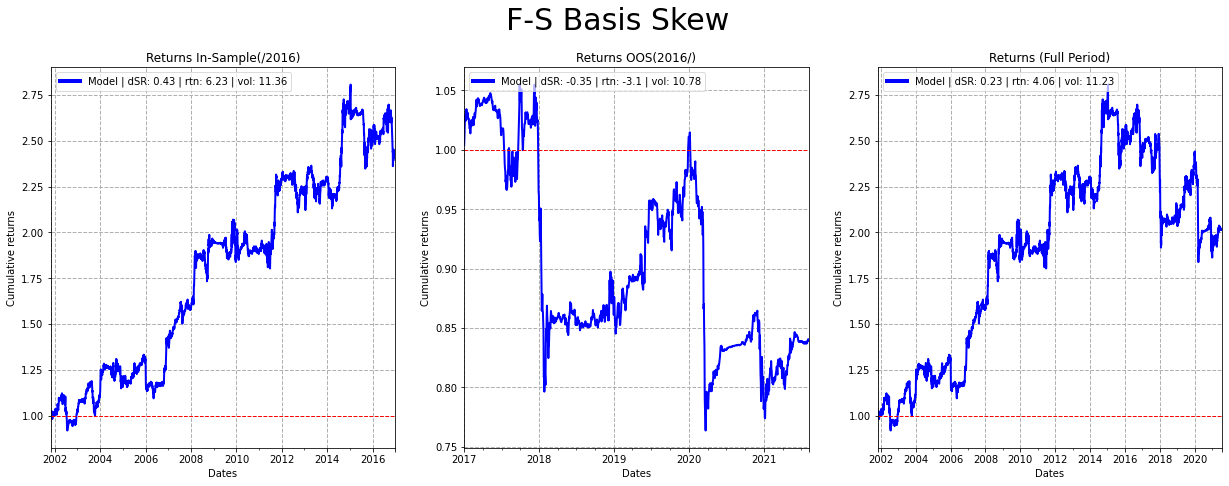

In [15]:
gs = GridSpec(nrows = 1, ncols = 3)
fig = plt.figure(figsize=(21, 7))
fig.suptitle(t="F-S Basis Skew", fontsize=30, y=1)

fig.add_subplot(gs[0]).set_label(gen_plot_rtn(daily_bt.model_rtn[:"2016"], main = "Returns In-Sample(/2016)", compound=True))
fig.add_subplot(gs[1]).set_label(gen_plot_rtn(daily_bt.model_rtn["2017":], main = "Returns OOS(2016/)", compound=True))
fig.add_subplot(gs[2]).set_label(gen_plot_rtn(daily_bt.model_rtn, main = "Returns (Full Period)", compound=True))